In [1]:
#@author: Masayuki Ishimaru

In [2]:
# import libraries

%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# Read regression model and parameters to scale back

In [3]:
with open('best_gaussr_RI.pickle', mode='rb') as f:
    best_gaussr_RI= pickle.load(f)

In [4]:
RI_mean_std_GPR = np.load('RI_mean_std_GPR.npy')

# Raed random samples generated

In [5]:
df_MMF = pd.read_csv('generated_samples_fit_dist.csv')
df_GMM = pd.read_csv('generated_samples_GMM_adj.csv')

In [6]:
print(df_MMF.shape)
df_MMF.head(2)

(9995, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,12.646214,3.926736,1.277143,72.883933,0.246862,8.925196,0.093915,0.000000
1,13.491717,0.276948,1.255108,75.450401,0.319200,9.121815,0.032383,0.052429


In [7]:
print(df_GMM.shape)
df_GMM.head(2)

(10006, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.461839,2.637539,1.707760,72.360974,0.484848,9.205489,0.000000,0.141550
1,12.337395,3.647837,1.254905,72.915378,0.669285,9.066485,0.000422,0.108294


In [8]:
#　Get column numbers of start and end

start = df_MMF.columns.get_loc('Na')
end   = df_MMF.columns.get_loc('Fe') + 1
print('start = ', start)
print('end   = ', end)

start =  0
end   =  8


In [9]:
# scaling

def standardize_dataframe(X, X_base):
    X_scaled = (X - X_base.mean(axis = 0)) / X_base.std(axis = 0)
    
    return X_scaled

# Backward analysis

In [10]:
# read variables for scaling

df_mean_std = pd.read_csv('glass.csv')
df_mean_std = df_mean_std.iloc[:, 2:10]
print(df_mean_std.shape)
df_mean_std.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
# Compute prediction on distribution fit samples

y_MMF_mean_s, y_MMF_std_s = best_gaussr_RI.predict(standardize_dataframe(df_MMF, df_mean_std), return_std = True)

y_MMF_mean = y_MMF_mean_s * RI_mean_std_GPR[1] + RI_mean_std_GPR[0]
y_MMF_std  = y_MMF_std_s * RI_mean_std_GPR[1]

df_MMF['pred_RI_mean'] = y_MMF_mean
df_MMF['pred_RI_std']  = y_MMF_std

df_MMF['group'] = 'MMF'
df_MMF.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,pred_RI_mean,pred_RI_std,group
0,12.646214,3.926736,1.277143,72.883933,0.246862,8.925196,0.093915,0.000000,1.518643,0.001020,MMF
1,13.491717,0.276948,1.255108,75.450401,0.319200,9.121815,0.032383,0.052429,1.514196,0.001049,MMF
2,13.908396,0.045730,1.962717,74.636427,0.505982,7.283779,1.636192,0.020777,1.513556,0.001054,MMF
3,13.203391,0.280996,1.005600,75.910761,0.582958,8.693992,0.295703,0.026598,1.513639,0.001069,MMF
4,12.957803,3.208117,1.880531,72.555756,0.000000,8.591894,0.750228,0.055672,1.518408,0.001025,MMF


In [12]:
# Compute prediction on GMM samples

y_GMM_mean_s, y_GMM_std_s = best_gaussr_RI.predict(standardize_dataframe(df_GMM, df_mean_std), return_std = True)

y_GMM_mean = y_GMM_mean_s * RI_mean_std_GPR[1] + RI_mean_std_GPR[0]
y_GMM_std  = y_GMM_std_s * RI_mean_std_GPR[1]

df_GMM['pred_RI_mean'] = y_GMM_mean
df_GMM['pred_RI_std']  = y_GMM_std

df_GMM['group'] = 'GMM'
df_GMM.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,pred_RI_mean,pred_RI_std,group
0,13.461839,2.637539,1.707760,72.360974,0.484848,9.205489,0.000000,0.141550,1.518482,0.001016,GMM
1,12.337395,3.647837,1.254905,72.915378,0.669285,9.066485,0.000422,0.108294,1.518568,0.001017,GMM
2,13.372728,3.131070,1.464743,72.991636,0.595887,8.321914,0.000000,0.122022,1.516728,0.001014,GMM
3,13.301951,2.802002,1.586540,72.836510,0.526938,8.754027,0.000000,0.192032,1.517346,0.001017,GMM
4,13.708569,3.737794,1.838826,70.914756,0.664621,8.989460,0.000355,0.145619,1.520193,0.001031,GMM


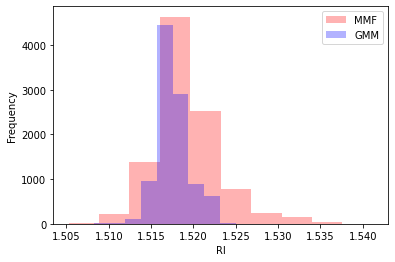

In [13]:
fig = plt.figure(figsize=(6, 4))

plt.hist(y_MMF_mean, color = 'r', alpha = 0.3, label = 'MMF')
plt.hist(y_GMM_mean, color = 'b', alpha = 0.3, label = 'GMM')

plt.xlabel('RI')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

plt.show()

# Concatnate predictions

In [14]:
df_sample_all = pd.concat([df_MMF, df_GMM])
print(df_sample_all.shape)
df_sample_all.head()

(20001, 11)


,Na,Mg,Al,Si,K,Ca,Ba,Fe,pred_RI_mean,pred_RI_std,group
0,12.646214,3.926736,1.277143,72.883933,0.246862,8.925196,0.093915,0.000000,1.518643,0.001020,MMF
1,13.491717,0.276948,1.255108,75.450401,0.319200,9.121815,0.032383,0.052429,1.514196,0.001049,MMF
2,13.908396,0.045730,1.962717,74.636427,0.505982,7.283779,1.636192,0.020777,1.513556,0.001054,MMF
3,13.203391,0.280996,1.005600,75.910761,0.582958,8.693992,0.295703,0.026598,1.513639,0.001069,MMF
4,12.957803,3.208117,1.880531,72.555756,0.000000,8.591894,0.750228,0.055672,1.518408,0.001025,MMF


# Narrow down in the targets

In [15]:
df_sample_all = df_sample_all[df_sample_all['pred_RI_mean'] >= 1.523]
df_sample_all = df_sample_all[df_sample_all['pred_RI_mean'] <= 1.5235]

In [16]:
print(df_sample_all.shape)
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)
df_sample_all

(191, 11)


,Na,Mg,Al,Si,K,Ca,Ba,Fe,pred_RI_mean,pred_RI_std,group
319,14.32,3.10,1.55,70.03,0.55,9.81,0.16,0.47,1.52,0.00,MMF
333,13.03,3.74,0.93,70.87,1.11,9.88,0.16,0.29,1.52,0.00,MMF
354,14.75,3.86,1.81,69.67,0.25,9.62,0.03,0.01,1.52,0.00,MMF
506,12.98,3.55,1.08,70.93,0.92,8.88,1.46,0.19,1.52,0.00,MMF
561,12.37,3.25,1.10,71.68,0.30,9.41,1.66,0.23,1.52,0.00,MMF
...,...,...,...,...,...,...,...,...,...,...,...
8496,13.04,4.42,1.80,69.48,1.48,6.60,3.17,0.00,1.52,0.00,GMM
9311,13.37,4.22,1.32,70.86,0.14,10.09,0.00,0.00,1.52,0.00,GMM
9520,13.44,4.93,1.61,70.17,0.09,9.66,0.10,0.00,1.52,0.00,GMM
9739,13.91,4.64,1.00,70.75,0.07,9.63,0.00,0.00,1.52,0.00,GMM


In [17]:
# save the solution

df_sample_all.to_csv('solution_GPR.csv', index = None)

# Clustering of the solution

In [18]:
df_experiment = pd.read_csv('solution_GPR.csv')
df_experiment = df_experiment.iloc[:, start:end]
print(df_experiment.shape)
df_experiment.head()

(191, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,14.32,3.10,1.55,70.03,0.55,9.81,0.16,0.47
1,13.03,3.74,0.93,70.87,1.11,9.88,0.16,0.29
2,14.75,3.86,1.81,69.67,0.25,9.62,0.03,0.01
3,12.98,3.55,1.08,70.93,0.92,8.88,1.46,0.19
4,12.37,3.25,1.10,71.68,0.30,9.41,1.66,0.23


# Clustering by Gaussian mixture model (GMM)
Reference:<br>
https://datachemeng.com/gaussianmixturemodel/<br>

In [19]:
max_number_of_components = 20

covariance_types = ['full', 'diag', 'tied', 'spherical']

In [20]:
bic_values = np.empty([max_number_of_components, len(covariance_types)])
bic_values.shape

(20, 4)

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = df_experiment.iloc[:, start:end]

from sklearn.mixture import GaussianMixture

# Grid search using BIC
for covariance_type_index, covariance_type in enumerate(covariance_types):
    for number_of_components in range(max_number_of_components):
        gmm_model = GaussianMixture(n_components = number_of_components + 1, covariance_type = covariance_type)
        gmm_model.fit(X)
        bic_values[number_of_components, covariance_type_index] = gmm_model.bic(X)

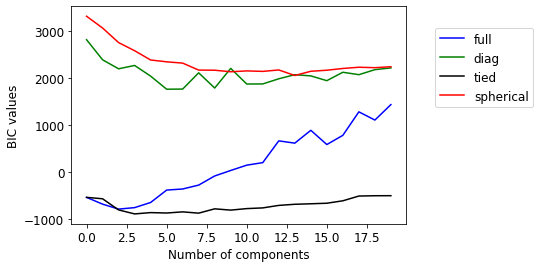

In [23]:
# Plot

plt.rcParams["font.size"] = 12
plt.figure()

plt.plot(bic_values[:, 0], 'b-', label='full')
plt.plot(bic_values[:, 1], 'g-', label='diag')
plt.plot(bic_values[:, 2], 'k-', label='tied')
plt.plot(bic_values[:, 3], 'r-', label='spherical')

plt.xlabel('Number of components')
plt.ylabel('BIC values')
plt.legend(bbox_to_anchor=(0.88, 0.9, 0.5, 0.001), borderaxespad=0., )
plt.show()

In [24]:
# Select the cluster number with smallest BIC

optimal_index = np.where(bic_values == bic_values.min())
optimal_number_of_components = optimal_index[0][0] + 1
optimal_covariance_type = covariance_types[optimal_index[1][0]]

print(optimal_index)
print(optimal_number_of_components)
print(optimal_covariance_type)

(array([3], dtype=int64), array([2], dtype=int64))
4
tied


In [25]:
# GMM fit

gmm = GaussianMixture(n_components = optimal_number_of_components, covariance_type = optimal_covariance_type)
gmm.fit(X)

GaussianMixture(covariance_type='tied', n_components=4)

In [26]:
# mean and covariance
means = gmm.means_
if gmm.covariance_type == 'full':
    all_covariances = gmm.covariances_
    
elif gmm.covariance_type == 'diag':
    all_covariances = np.empty([gmm.n_components, gmm.covariances_.shape[1], gmm.covariances_.shape[1]])
    
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(gmm.covariances_[component_number, :])
        
elif gmm.covariance_type == 'tied':
    all_covariances = np.tile(gmm.covariances_, (gmm.n_components, 1, 1))
    
elif gmm.covariance_type == 'spherical':
    all_covariances = np.empty([gmm.n_components, gmm.means_.shape[1], gmm.means_.shape[1]])
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(gmm.covariances_[component_number] * np.ones(gmm.means_.shape[1]))

In [27]:
labels = gmm.predict(X)
labels

array([2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 3, 2, 0, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 2,
       2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [28]:
df_experiment['CLS_label'] = labels
print(df_experiment.shape)
df_experiment.head()

(191, 9)


,Na,Mg,Al,Si,K,Ca,Ba,Fe,CLS_label
0,14.32,3.10,1.55,70.03,0.55,9.81,0.16,0.47,2
1,13.03,3.74,0.93,70.87,1.11,9.88,0.16,0.29,2
2,14.75,3.86,1.81,69.67,0.25,9.62,0.03,0.01,2
3,12.98,3.55,1.08,70.93,0.92,8.88,1.46,0.19,1
4,12.37,3.25,1.10,71.68,0.30,9.41,1.66,0.23,1


In [29]:
# dictionary of colors

color_codes = {0:'red',
               1:'green',
               2:'blue',
               3:'yellow',
               4:'magenta',
               5:'orange',
               6:'gray'}

# make color list

colors = []
for i in range(len(labels)) :
    colors.append(color_codes[labels[i]])

# Plot results (small = high variance, large = small variance of GPR model)

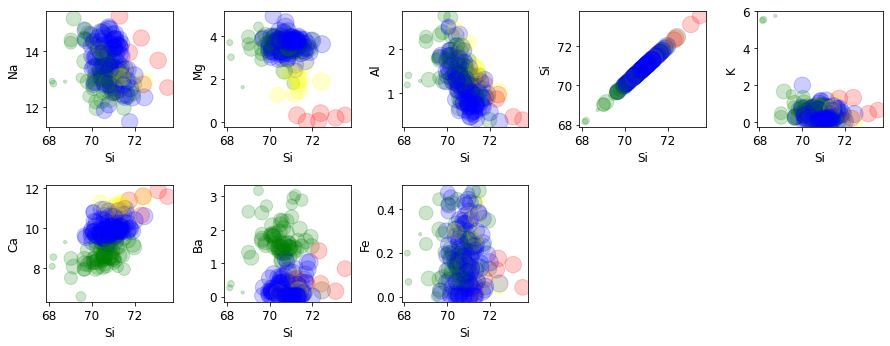

In [30]:
horz = 5
vert = 5
graph_num = horz * vert
ax = []

fig = plt.figure(figsize=(15, 15))

for i in range(0, end - start):
    ax.append(fig.add_subplot(vert, horz, i+1))

    x_sample = df_sample_all.iloc[:, 3]
    y_sample = df_sample_all.iloc[:, i]
    
    RI_std_max = df_sample_all['pred_RI_std'].max()
    RI_std_min = df_sample_all['pred_RI_std'].min()
    m_size = 10 + 300 * (RI_std_max - df_sample_all['pred_RI_std']) / (RI_std_max - RI_std_min)
    
    ax[i].scatter(x_sample, y_sample, c = colors, marker = 'o', alpha = 0.2, s = m_size)
    ax[i].set_xlabel(df_experiment.columns[3], size = 12)
    ax[i].set_ylabel(df_experiment.columns[i], size = 12)

plt.subplots_adjust(wspace = 0.4, hspace = 0.5)
plt.show()